In [ ]:
import pandas as pd
import numpy as np


#Se descargaron los datos de la página , a diferencia de mis compañeros yo tuve problemas con utilizar el archivo .csv ya que
#era muy pesado y me marcaba problemas de memoria, así que lo separé en diferences archivos .csv que leí con pandas, quité 
#información innecesaria y guardé en un nuevo archivo .csv que mi computadora sí pudiera manejar



edf=pd.read_csv('200910COVID19MEXICO_0.csv', encoding='latin', low_memory=False)
edf0=pd.DataFrame(edf)

for i in range(15):
    edfi=pd.read_csv('200910COVID19MEXICO_'+str(i)+'.csv', encoding='latin', low_memory=False)
    edfi=pd.DataFrame(edfi)
    edfi.columns=edf0.columns
    edfi=edfi.drop('ID_REGISTRO',axis=1)
    edfi=edfi.drop('FECHA_ACTUALIZACION',axis=1)
    edfi=edfi.drop('FECHA_INGRESO',axis=1)
    edfi=edfi.drop('FECHA_SINTOMAS',axis=1)
    edfi=edfi.drop('TIPO_PACIENTE',axis=1)
    edfi=edfi.drop('ENTIDAD_NAC',axis=1)
    edfi=edfi.drop('ORIGEN',axis=1)
    edfi=edfi.drop('SECTOR',axis=1)
    edfi=edfi.drop('MUNICIPIO_RES',axis=1)
    edfi=edfi.drop('ENTIDAD_UM',axis=1)
    edfi=edfi.drop('INTUBADO',axis=1)
    edfi=edfi.drop('NEUMONIA',axis=1)
    edfi=edfi.drop('NACIONALIDAD',axis=1)
    edfi=edfi.drop('PAIS_NACIONALIDAD',axis=1)
    edfi=edfi.drop('PAIS_ORIGEN',axis=1)
    edfi=edfi.drop('UCI',axis=1)
    edfi=edfi.drop('MIGRANTE',axis=1)
    edfi=edfi.drop('HABLA_LENGUA_INDIG',axis=1)
    edfi=edfi.loc[edfi.FECHA_DEF!='9999-99-99',:]
    edfi=edfi.drop('FECHA_DEF',axis=1)
    edfi=edfi.loc[edfi.RESULTADO==1,:]
    edfi=edfi.drop('RESULTADO',axis=1)
    if i!=0:
        edf=edf.append(edfi)
    else:
        edf=edfi

edf.to_csv('muertes_covid.csv', index=None)

In [36]:
#se lee el csv que contiene los datos de personas que han fallecido y que tienen resultado positivo a la prueba de COVID
df=pd.read_csv('muertes_covid.csv')
df=pd.DataFrame(df)

#se hizo una lista con número de identificación de los estados de la republica para que sea más sencillo leer la información
estados = [' ', 'Aguascalientes', "Baja California", "Baja California Sur", "Campeche", "Coahuila","Colima","Chiapas","Chihuahua",
           "Distrito Federal", "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Edo Mex", "Michoacán","Morelos", "Nayarit",
           "Nuevo León", "Oaxaca", "Puebla","Querétaro","Quintana Roo","San Luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala",
           "Veracruz","Yucatán","Zacatecas"]

titulos=list(df.columns)


print('La edad promedio de fallecimiento es '+ str(df.EDAD.mean())+'\n')
print('La edad promedio de fallecimiento en hombres es '+str(df6.EDAD[2])+ ' y en mujeres es ' +str(df6.EDAD[1])+'\n')
df6=df.groupby(['SEXO'])[['EDAD']].mean(np.array)
df3=df.loc[df.SEXO!=2,:]
df3=df.loc[df.EMBARAZO==1,:]
#df3




max=df['ENTIDAD_RES'].value_counts()
print('El estado con más muertes es '+str(estados[max.idxmax()])+' con '+str(max.max())+' muertes\n')



min=df['ENTIDAD_RES'].value_counts()


print('El estado con menos muertes es '+str(estados[min.idxmin()])+' con '+str(min.min())+' muertes\n')



menores=df['EDAD'].value_counts()
menores.min()
print('Hay registro de  '+str(menores[menores.min()])+' niños de 1 año de edad fallecidos por COVID\n')



La edad promedio de fallecimiento es 62.23454751683441

La edad promedio de fallecimiento en hombres es 61.66827223262867 y en mujeres es 63.258294698649465

El estado con más muertes es Edo Mex con 10656 muertes

El estado con menos muertes es Baja California Sur con 402 muertes

Hay registro de  41 niños de 1 año de edad fallecidos por COVID



In [35]:
#edf4=df.loc[df.OTRO_CASO==1,:]
#edf4=edf4.groupby('ENTIDAD_RES')[['OTRO_CASO']].sum()
#edf4

s2=np.zeros((32,12), dtype=int)
s2[:,0]=range(1,33)



for i in range(4,15):    
    rf=df[df.iloc[:, i] == 1]
    s=rf.groupby(['ENTIDAD_RES'])[titulos[i]].sum(np.array)
    s2[:,(i-3)]=s




for i in range(32):
    result=np.where(s2[i,:]==np.amax(s2, axis=1)[i])
    result=np.asscalar(result[0])
    
    print('Comorbilidad más común entre fallecidos del estado de '+estados[i+1]+' es '+str(titulos[3+result])+'\n') 
    #los indices 0-3 no corresponden a enfermedades así que debemos sumarle 3 a titulos
    


Comorbilidad más común entre fallecidos del estado de Aguascalientes es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Baja California es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Baja California Sur es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Campeche es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Coahuila es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Colima es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Chiapas es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Chihuahua es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Distrito Federal es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Durango es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Guanajuato es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Guerrero es HIPERTENSION

Comorbili

c:\python36-32\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


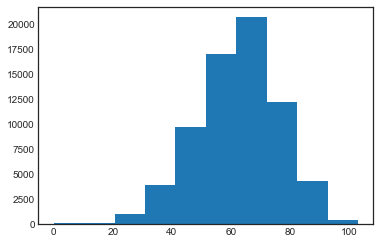

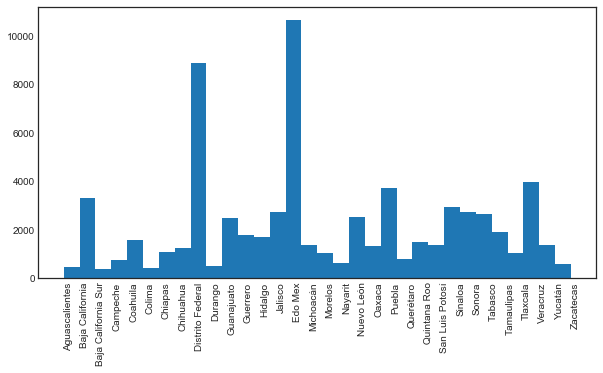

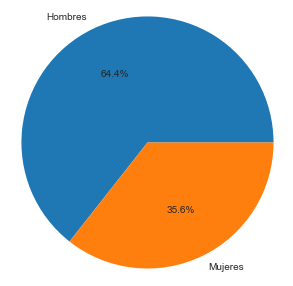

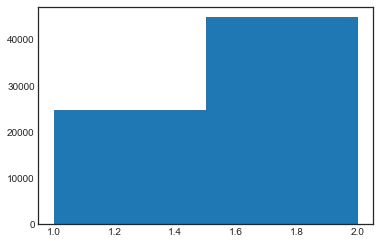

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(df.EDAD)
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xticks(np.arange(len(estados)))
ax.set_xticklabels(estados)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.hist(df.ENTIDAD_RES, bins=32)
plt.show()


pay=df['SEXO'].value_counts()/df['SEXO'].value_counts().sum()

labels='Hombres','Mujeres'
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(pay, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


plt.hist(df.SEXO, bins=2)
plt.show()
